In [81]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import string
import os
import re
from nltk.corpus import stopwords

def clean_str(string):
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)
    string = re.sub(r",", "", string)
    string = string.strip().lower()
    stopWords = set(stopwords.words('english'))
    trans_string = ' '.join([word for word in string.strip().split() if word not in stopWords and word not in 'im'])
    return trans_string

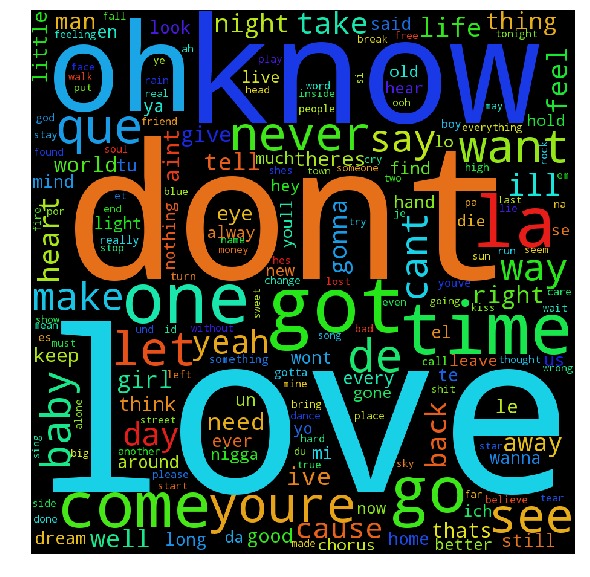

In [103]:
lyrics = pd.read_csv("./Lyrics1.csv").sample(50000)
songs = [clean_str('. '.join(x.splitlines())) for x in lyrics["Lyrics"]] ## remove newline characters

all_songs = ' '.join(songs)

wordcloud_all_songs = WordCloud(width=900, height=900, relative_scaling=.9).generate(all_songs)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_all_songs)
plt.axis("off")
plt.show()

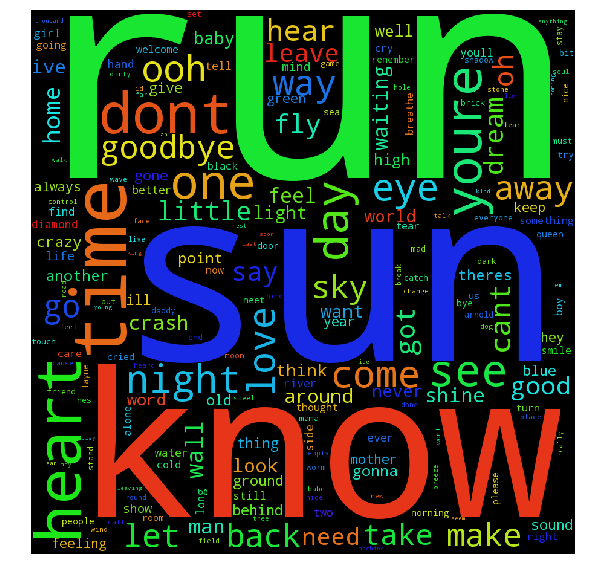

In [63]:
lyrics1 = pd.read_csv("./Lyrics1.csv")
lyrics2 = pd.read_csv("./Lyrics2.csv")

lyrics1 = lyrics1[lyrics1["Band"]=="Pink Floyd"]
lyrics2 = lyrics2[lyrics2["Band"]=="Pink Floyd"]

floyd = pd.concat([lyrics1, lyrics2])

floyd_songs = ['. '.join(x.splitlines()) for x in floyd["Lyrics"]]
all_floyd_songs = clean_str('. '.join(floyd_songs))

wordcloud_hc = WordCloud(width=900, height=900, relative_scaling=.8).generate(all_floyd_songs)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()

In [126]:
from collections import Counter, OrderedDict
tri_grams = []
#lyrics = pd.read_csv("./Lyrics1.csv").sample(50000)
#songs = [clean_str('. '.join(x.splitlines())) for x in lyrics["Lyrics"]] ## remove newline characters

for i in range(len(songs)):
    words = ''.join([c for c in songs[i] if c not in string.punctuation]).split()
    for j in range(len(words)-2):
        if(len(set([words[j], words[j+1], words[j+2]])) == 3):
            tri_grams.append(words[j] + ' ' + words[j+1] + ' ' + words[j+2])# + ' ' + words[j+3])

tri_grams_counts = OrderedDict(Counter(tri_grams).most_common(30))

tri_grams_df = pd.DataFrame.from_dict(tri_grams_counts, orient='index')

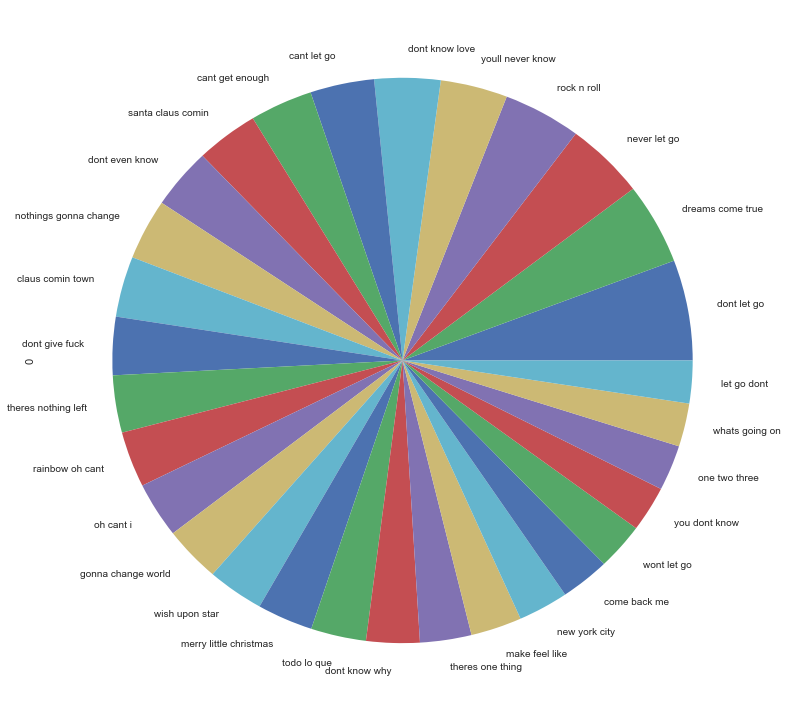

In [127]:
plt.show(tri_grams_df.plot(kind='pie', figsize = (13,13), subplots=True, legend = False))